# Reading Data:

In [2]:
import pandas as pd
df = pd.read_excel('adsdata.xlsx')
import numpy as np

In [3]:
df.head()

,content,category
0,You need chocolate when life gives you bitter ...,"Foods,Dairy and Beverages"
1,Instant noode a smart soution for your hunger ...,"Foods,Dairy and Beverages"
2,Make your purchases using our visa card for se...,Banking Insurance and Financial Services
3,We are the authorize agent to help workers and...,Household and Office
4,Vacancy announcement for the new recruiment fo...,Recruiment


# Resolving spelling mistakes

In [4]:
df=df.replace('Recruiment','Recruitment') 

# Analyzing data

In [5]:
df.category.value_counts()

Recruitment                                 204
Sports                                      203
Engineering and Technology                  201
Banking Insurance and Financial Services    201
Agriculture                                 201
Foods,Dairy and Beverages                   200
Fashion and Beauty                          200
Machineries and Instrument                  200
Energy and Environment                      200
Education                                   200
Construction                                200
Travel and Tourism                          200
Entertainment                               200
Household and Office                        200
Hotel and Restaurants                       199
Health and Medicine                         199
Arts                                        198
Name: category, dtype: int64

In [6]:
for col in df.columns:
    print (col)

content
category


In [7]:
df.columns

Index(['content', 'category'], dtype='object')

# Data visualization

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
df.category.value_counts().plot(kind='bar');

# Data Cleansing

In [9]:
from nltk.corpus import stopwords

import pandas as pd
import numpy as np

import nltk

import re

## Removing null cells

In [10]:

df = df[pd.notnull(df['category'])]

 Total words Count

In [11]:

print('Total words or features:')
print(df['content'].apply(lambda x: len(x.split(' '))).sum())


Total words or features:
39798


## StopWords Removal

In [12]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

STOPWORDS = set(stopwords.words('english'))

In [13]:
#prepare text clean function

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
   ## we dont need text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    



In [14]:
#apply text cleaner
df['content'] = df['content'].apply(clean_text)

In [15]:
## again count total number of features 
print('Total number of words or features:')
print(df['content'].apply(lambda x: len(x.split(' '))).sum())



Total number of words or features:
25356


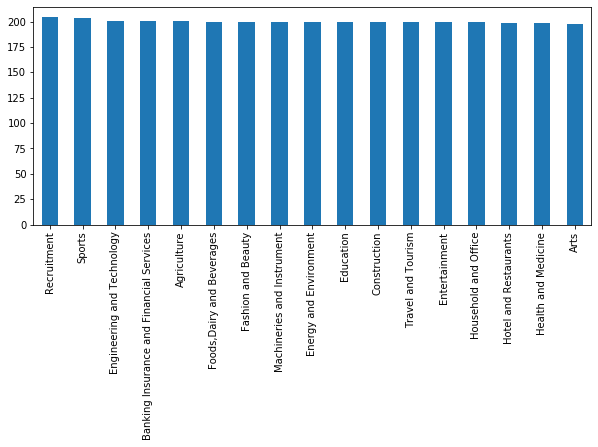

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
df.category.value_counts().plot(kind='bar');

# Train Test Split

In [17]:
##split to train and test set 


from sklearn.model_selection import train_test_split

X = df.content
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)


In [18]:
X_train

3274    hatching eggs quality pollutry production avai...
2342      farming tractors april 30 contact fast discount
2554                         buy whisle shop cheaper rate
1231                                         lots choices
221              plumber required home maintanance office
543     finalized artist director upcoming moviealso s...
1575          complete computer hardware software courses
2442                            ease banking elder people
685                    peanut butterfudge fat bomb 399 rs
1114                                company opening today
2633                     different varity balls available
2815     new car designed mechanical enginner lounch soon
1352                         futsal tournament jully 20th
1814                      vacany announcement staff nurse
789                 contact us better services facilities
3008    buy men summer beach casual shorts athletic gy...
1052    digital pill box medicine container time alarm...
1572          

# Training Multinomial Naive Bayes Classifier Using SkLearn 

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix

my_tags = ['Recruitment',
           'Foods,Dairy and Beverages',
           'Fashion and Beauty',
           'Machineries and Instrument',
           'Travel and Tourism',
           'Energy and Environment',
           'Agriculture',
           'Health and Medicine',
           'Constructions',
           'Banking Insurance and Financial Services',
           'Hotel and Restaurants',
           'Education',
           'Entertainment',
           'Sports',
           'Engineering  and Technology',
           'Household and Office',
           'Machineries and Instrument'
           
          ]


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB(alpha=.01)),
              ])
nb.fit(X_train, y_train)

%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
print(y_pred)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

Wall time: 0 ns
['Engineering and Technology' 'Travel and Tourism' 'Arts' 'Agriculture'
 'Entertainment' 'Education' 'Hotel and Restaurants' 'Travel and Tourism'
 'Construction' 'Arts' 'Engineering and Technology' 'Arts' 'Agriculture'
 'Engineering and Technology' 'Travel and Tourism' 'Agriculture'
 'Health and Medicine' 'Entertainment' 'Recruitment'
 'Machineries and Instrument' 'Hotel and Restaurants'
 'Foods,Dairy and Beverages' 'Travel and Tourism' 'Household and Office'
 'Travel and Tourism' 'Sports' 'Health and Medicine' 'Education'
 'Foods,Dairy and Beverages' 'Fashion and Beauty'
 'Engineering and Technology' 'Foods,Dairy and Beverages' 'Agriculture'
 'Fashion and Beauty' 'Energy and Environment' 'Construction'
 'Machineries and Instrument' 'Sports' 'Recruitment' 'Education'
 'Agriculture' 'Arts' 'Hotel and Restaurants' 'Travel and Tourism'
 'Energy and Environment' 'Recruitment' 'Construction' 'Sports'
 'Entertainment' 'Sports' 'Household and Office' 'Entertainment'
 'Engineer

# Predict New Content Category

In [20]:
ToPredict= ['Hello from the otherside song released today listen']

In [21]:
str1 = ''.join(str(e) for e in ToPredict)
str1

'Hello from the otherside song released today listen'

In [22]:
ToPredict=clean_text(str1)

In [23]:
nb.predict([ToPredict])

array(['Arts'], dtype='<U40')

# Serializing the model

In [24]:

import pickle

filename = 'finalized_model.sav'
pickle.dump(nb, open(filename, 'wb'))
 
# some time later...
 


# Loading Serialized Model and Prediction

In [25]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model
result = loaded_model.predict(['Intelligent skin color that supports resilience and radiance'])
print(result)

['Fashion and Beauty']


# Using Logistic Regression and Word2Vec


In [26]:
import gensim
from gensim.models import Word2Vec
#the following line throws error due to 32 bit python shifting to 64 bit might resolve error
wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)


#explore some vocabularies
from itertools import islice
list(islice(wv.vocab, 13030, 13050))


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [27]:

def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, content) for content in text_list ])

#this tokenizes text
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3, random_state = 42)



In [28]:

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['content']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['content']), axis=1).values

train_tokenized

array([list(['new', 'enviroment', 'friendly', 'elecric', 'cars', 'power', 'wonderful', 'features', 'available', 'showroom', 'ordern', 'get', 'special', 'discount', 'offers']),
       list(['civil', 'engineer', 'building', 'minimum', 'year', 'experience']),
       list(['ktmwashingtonktm', 'npr', '16', '1004']), ...,
       list(['offer', 'laptop', 'limited', 'periods']),
       list(['looking', 'tamato', 'farming', 'contact', 'us', 'different', 'procedure', 'techinques']),
       list(['contact', 'us', 'door', 'door', 'delivery', 'kitchen', 'items'])],
      dtype=object)

In [29]:

X_train_word_average = word_averaging_list(wv,train_tokenized) #use as train set of post
X_test_word_average = word_averaging_list(wv,test_tokenized)  #use as test set of words

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  if __name__ == '__main__':


In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['category'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.category))
print(classification_report(test.category, y_pred,target_names=my_tags))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.9050880626223092
                                          precision    recall  f1-score   support

                             Recruitment       0.92      0.96      0.94        57
               Foods,Dairy and Beverages       0.95      0.94      0.94        62
                      Fashion and Beauty       0.90      0.93      0.91        56
              Machineries and Instrument       0.78      0.92      0.84        53
                      Travel and Tourism       0.92      0.90      0.91        61
                  Energy and Environment       0.98      0.97      0.98        61
                             Agriculture       0.76      0.89      0.82        44
                     Health and Medicine       0.80      0.84      0.82        61
                           Constructions       1.00      0.86      0.92        76
Banking Insurance and Financial Services       0.92      0.92      0.92        72
                   Hotel and Restaurants       0.95      0.88      0.

In [33]:
ah = w2v_tokenize_text('Nurture yourself with nature kalinchowk tours and travel packages available at affordable prices')
wave= word_averaging_list(wv,ah)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  if __name__ == '__main__':


In [34]:
logreg.predict(wave)

array(['Education', 'Health and Medicine', 'Engineering and Technology',
       'Foods,Dairy and Beverages',
       'Banking Insurance and Financial Services', 'Health and Medicine',
       'Sports', 'Health and Medicine',
       'Banking Insurance and Financial Services',
       'Engineering and Technology', 'Construction',
       'Health and Medicine', 'Health and Medicine'], dtype=object)